<a href="https://colab.research.google.com/github/ZeroLeon/NLP_Project_with_FastAI/blob/master/Music_Generator_LM_with_Fastai(on_progress).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Step: Reproduce the outcomes of other's models

Related Links:

[Musenet](https://openai.com/blog/musenet/)

[Musicautobot](https://musicautobot.com/#/song/aeee134e4034e5f98bb630c56d2f7f8c)

[Musicautobot Source](https://github.com/bearpelican/musicautobot)

[musical-neural-net](https://github.com/mcleavey/musical-neural-net)

[piano-transformer](https://magenta.tensorflow.org/piano-transformer)


Resources:

[Classical Music MIDI(Kaggle Dataset)](https://www.kaggle.com/soumikrakshit/classical-music-midi)

[Generating Music With Artificial Intelligence](https://towardsdatascience.com/generating-music-with-artificial-intelligence-9ce3c9eef806)



Things about Processing MIDI files

- **notewise**, Use string representing the pitch (the note name) and the octave.

- **chordwise** Chords are set of notes that are played at the same time. 

- **Without considering time offsets of each element**. All the notes and chords will have the same duration.The way 'musical-neural-net' are using.

## piano-transformer

## musical-neural-net

In [0]:
import os 
from pathlib import Path
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)
base_dir = '/content/gdrive/My Drive/fastai'
path = Path(base_dir +'/data/')
path.mkdir(parents=True,exist_ok=True) 
os.chdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = Path('/content/gdrive/My Drive/fastai/music_generator')
os.chdir(path)

In [0]:
!git clone https://github.com/mcleavey/musical-neural-net.git

Cloning into 'musical-neural-net'...
remote: Enumerating objects: 30682, done.
remote: Total 30682 (delta 0), reused 0 (delta 0), pack-reused 30682
Receiving objects: 100% (30682/30682), 1.43 GiB | 14.93 MiB/s, done.
Resolving deltas: 100% (25721/25721), done.
Checking out files: 100% (247/247), done.


In [0]:
%cd musical-neural-net

/content/gdrive/My Drive/fastai/music_generator/musical-neural-net


### Train a LM on midi files with fastai

In [0]:
tokenizer = Tokenizer()

In [0]:
def music_tokenizer(x): return x.split(" ")

In [0]:
mu_tokenizer = Tokenizer(
    tok_func= FastAiMusicTokenizer(music_tokenizer),
    pre_rules=[], 
    post_rules=[]
)

In [0]:
class FastAiMusicTokenizer(BaseTokenizer):
    def __init__(self, tokenizer: mu_tokenizer, **kwargs):
        self._pretrained_tokenizer = tokenizer

    def __call__(self, *args, **kwargs):
        return self

In [0]:
databunch = TextLMDataBunch.from_folder('/content/gdrive/My Drive/fastai/music_generator/musical-neural-net/data', train='train', valid='test', 
                  tokenizer=mu_tokenizer,            
                  include_bos=False,
                  include_eos=False,
             )

In [0]:
databunch.show_batch(15)

idx,text
0,wait1 p11 wait5 endp11 endp58 wait1 p0 p12 p34 p46 wait5 endp0 endp12 wait1 p1 p13 wait5 endp1 endp13 endp46 wait1 p2 p14 p22 p34 wait5 endp2 endp14 wait1 p10 p17 wait3 endp10 endp17 wait2 endp22 endp34 wait1 p11 p46 p58 wait5 endp11 wait1 p0 p12 wait5 endp0 endp12 endp58 wait1 p1 p13 p34 p46 wait5 endp1 endp13 wait1 p2 p14 wait5 endp2 endp14 endp46 wait1 p3 p15 p22 p34
1,wait25 wait25 endp16 endp23 endp32 wait1 p40 wait25 wait25 wait1 endp40 wait3 p40 wait25 wait25 wait1 p40 wait25 wait25 wait25 wait25 wait25 wait12 endp40 wait1 p45 wait11 endp45 wait1 p43 wait11 endp43 wait2 p41 wait11 endp41 wait1 p38 wait11 endp38 wait3 p33 wait11 endp33 wait1 p35 wait11 endp35 wait3 p12 p31 wait23 endp12 wait2 p19 wait23 endp19 wait1 p24 p28 p36 p40 wait1 endp31 wait22 endp24 endp28 wait4 p19 wait20
2,p24 wait5 endp24 wait1 p26 wait5 endp26 wait1 p27 p36 p43 wait6 p20 p27 p36 p43 wait11 endp43 wait1 p20 p27 p36 p42 wait6 p20 p27 p36 p48 wait5 endp42 wait6 endp48 wait1 p20 p27 p36 p42 wait5 endp20 wait1 p19 p27 p36 p42 wait23 endp19 endp27 endp36 wait1 p42 endp42 p43 endp43 wait3 p40 endp40 wait1 p42 endp42 wait2 p45 wait8 endp45 wait1 p43 wait3 p19 p26 p35 p43
3,wait1 p33 p45 wait2 endp33 endp45 wait1 p34 p46 wait2 endp34 endp46 wait1 p35 p47 wait2 endp35 endp47 wait1 p30 p42 wait2 endp30 endp42 wait1 p33 p45 wait2 endp33 endp45 wait1 p31 p43 wait2 endp31 endp43 wait1 p30 p42 wait2 endp30 endp42 wait1 p28 p40 wait2 endp28 endp40 wait1 p26 p38 wait8 endp26 endp38 wait13 p30 p33 p38 wait3 p14 p26 wait2 endp14 endp26 wait6 endp38 wait1 p30 p33 p42
4,wait2 endp46 wait1 p44 wait2 endp44 wait1 p42 wait2 endp42 wait1 p44 wait2 endp44 wait1 p46 wait2 endp46 wait1 p47 wait2 endp47 wait1 p49 wait2 endp49 wait1 p51 wait2 endp51 wait1 p49 wait2 endp49 wait1 p47 wait2 endp47 wait1 p49 wait2 endp49 wait1 p51 wait2 endp51 wait1 p52 wait2 endp52 wait1 p54 wait2 endp54 wait1 p56 wait2 endp56 wait1 p57 wait2 endp57 wait1 p56 wait2 endp56 wait1 p54 wait2 endp54
5,p32 wait2 endp8 wait1 p10 p30 endp32 wait3 p29 endp30 wait3 endp29 wait3 p30 wait2 endp10 wait1 p6 endp30 p32 wait3 endp32 p34 wait3 endp34 wait3 p35 wait2 endp6 wait1 p1 p12 endp35 p37 wait3 p25 endp37 wait3 endp25 wait3 p24 wait2 endp12 wait1 p8 endp24 p25 wait3 endp25 p27 wait3 endp27 wait3 p29 wait2 endp1 endp8 wait1 p6 endp29 p30 wait11 endp30 wait13 p18 wait6 p30 wait5 endp18 endp30
6,p11 wait5 endp11 wait1 p12 wait5 endp12 wait1 p16 p19 p31 wait3 endp16 wait2 endp19 endp31 wait1 p28 wait5 endp28 wait1 p24 wait3 endp24 wait21 p23 wait5 endp23 wait1 p24 wait5 endp24 wait1 p27 p31 p43 wait3 endp27 wait2 endp31 endp43 wait1 p39 wait5 endp39 wait1 p36 wait3 endp36 wait21 p12 p24 p27 p31 p39 wait5 endp12 endp31 wait1 p17 p32 wait6 p17 p24 p27 p32 p39 wait12 p17 p24
7,wait1 p15 endp15 wait3 p19 p24 endp24 wait1 p15 endp15 p19 endp19 wait2 p0 p15 endp15 wait2 p19 wait1 endp0 p19 endp19 p24 endp24 wait2 endp12 wait1 p8 p15 endp15 wait3 p20 p24 endp24 wait1 p15 endp15 p20 endp20 wait2 p15 endp15 wait2 p20 wait1 p20 endp20 p24 endp24 wait3 p15 endp15 wait3 p20 p24 endp24 wait1 p15 endp15 p20 endp20 wait2 p0 p15 endp15 wait2 p20 wait1 p20 endp20
8,p32 p36 wait6 p27 p32 p36 wait2 endp41 endp53 wait1 p39 p51 wait2 endp27 endp32 endp39 endp51 wait1 p36 p48 wait2 endp36 endp48 wait1 p34 p46 wait3 p34 p46 wait2 endp34 endp46 wait1 p32 p44 wait3 p32 p44 wait2 endp32 endp44 wait1 p27 p39 wait2 endp27 endp39 wait1 p29 p41 wait17 endp29 endp41 wait1 p27 p39 wait5 endp27 endp39 wait1 p24 p36 wait5 endp24 endp36 wait1 p22 p34 wait5 endp22
9,p17 p32 p35 wait2 endp17 endp32 endp35 wait1 p18 p37 wait2 endp18 wait1 p20 p32 p35 wait2 endp20 endp32 endp35 wait1 p21 p37 wait3 p25 p30 p33 wait2 endp37 wait1 p25 p30 p33 p39 wait2 endp39 wait1 p25 p30 p33 p41 wait2 endp41 wait1 p25 p30 p33 p42 wait2 endp42 wait1 p25 p30 p33 p44 wait2 endp21 endp25 endp30 endp44 wait1 p13 p33 p45 wait3 p21 p28 p31 wait3 p21


In [0]:
len(databunch.vocab.itos),len(databunch.train_ds)

(160, 134)

In [0]:
learn =  language_model_learner(databunch, AWD_LSTM, drop_mult=0.1, wd=0.1, pretrained=False).to_fp16()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.74E-03
Min loss divided by 10: 1.45E-02


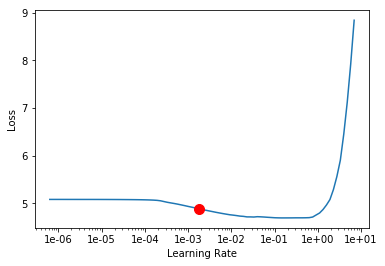

In [0]:
learn.recorder.plot(skip_end=1,suggestion=True)

In [0]:
lr = 2e-3 #for AWD_LSTM

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.119914,1.411093,0.616548,27:44


In [0]:
learn.save(path/'musical-neural-net/music_model0925',return_path=True)

PosixPath('/content/gdrive/My Drive/fastai/music_generator/musical-neural-net/music_model0925.pth')

In [0]:
# learn.destroy()

this Learner object self-destroyed - it still exists, but no longer usable


In [0]:
learn = language_model_learner(databunch, AWD_LSTM, drop_mult=0.1, wd=0.1).load('/content/gdrive/My Drive/fastai/music_generator/musical-neural-net/music_model0925')

In [0]:
# Takes time to continue training
# learn.fit_one_cycle(3, lr, moms=(0.8,0.7))

In [0]:
sample = 'p33 p39 wait3 endp39 wait3 p37 wait5 endp37 wait1 p36 wait5 endp33 endp36 wait1 p37 p52 wait5 endp37 endp52 wait1 p32 p51 wait5 endp51 wait1 p49 wait5 endp49 wait1 p48 wait5 endp48 wait1 p40 p49 wait1 endp32 wait1 endp40 wait3 endp49 wait1 p30 p39 p47 wait5 endp39 endp47 wait1 p37 p45 wait5 endp37 endp45 wait1 p36 p44 wait5'

In [0]:
generated_music = learn.beam_search(sample,n_words=3,temperature)

In [0]:
len(sample),len(generated_music)

(325, 667)

In [0]:
generated_music

'p33 p39 wait3 endp39 wait3 p37 wait5 endp37 wait1 p36 wait5 endp33 endp36 wait1 p37 p52 wait5 endp37 endp52 wait1 p32 p51 wait5 endp51 wait1 p49 wait5 endp49 wait1 p48 wait5 endp48 wait1 p40 p49 wait1 endp32 wait1 endp40 wait3 endp49 wait1 p30 p39 p47 wait5 endp39 endp47 wait1 p37 p45 wait5 endp37 endp45 wait1 p36 p44 wait5 p39 wait3 endp39 wait3 p37 wait5 endp37 wait1 p36 wait5 endp33 endp36 wait1 p37 p52 wait5 endp37 endp52 wait1 p32 p51 wait5 endp51 wait1 p49 wait5 endp49 wait1 p48 wait5 endp48 wait1 p40 p49 wait1 endp32 wait1 endp40 wait3 endp49 wait1 p30 p39 p47 wait5 endp39 endp47 wait1 p37 p45 wait5 endp37 endp45 wait1 p36 p44 wait5 endp36 endp44 wait1'

In [0]:
%cd musical-neural-net

/content/gdrive/My Drive/fastai/music_generator/musical-neural-net


### Trying to convert string to midi file

In [0]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
from math import floor
import music21
import random
import dill as pickle

In [0]:
def write_midi(s, filename, output_folder):
    fp = s.write('midi', fp=output_folder/filename)
    
def string_inds_to_stream(string, sample_freq, note_offset, chordwise):
    score_i = string.split(" ")
    if chordwise:
        return arrToStreamChordwise(score_i, sample_freq, note_offset)
    else:
        return arrToStreamNotewise(score_i, sample_freq, note_offset)

def arrToStreamChordwise(score, sample_freq, note_offset):

    speed=1./sample_freq
    piano_notes=[]
    violin_notes=[]
    time_offset=0
    for i in range(len(score)):
        if len(score[i])==0:
            continue

        for j in range(1,len(score[i])):
            if score[i][j]=="1":
                duration=2
                new_note=music21.note.Note(j+note_offset)    
                new_note.duration = music21.duration.Duration(duration*speed)
                new_note.offset=(i+time_offset)*speed
                if score[i][0]=='p':
                    piano_notes.append(new_note)
                elif score[i][0]=='v':
                    violin_notes.append(new_note)
    violin=music21.instrument.fromString("Violin")
    piano=music21.instrument.fromString("Piano")
    violin_notes.insert(0, violin)
    piano_notes.insert(0, piano)
    violin_stream=music21.stream.Stream(violin_notes)
    piano_stream=music21.stream.Stream(piano_notes)
    main_stream = music21.stream.Stream([violin_stream, piano_stream])
    return main_stream
                    
def arrToStreamNotewise(score, sample_freq, note_offset):
    speed=1./sample_freq
    piano_notes=[]
    violin_notes=[]
    time_offset=0
    
    i=0
    while i<len(score):
        if score[i][:9]=="p_octave_":
            add_wait=""
            if score[i][-3:]=="eoc":
                add_wait="eoc"
                score[i]=score[i][:-3]
            this_note=score[i][9:]
            score[i]="p"+this_note
            score.insert(i+1, "p"+str(int(this_note)+12)+add_wait)
            i+=1
        i+=1
        
    for i in range(len(score)):
        if score[i] in ["", " ", "<eos>", "<unk>"]:
            continue
        elif score[i][:3]=="end":
            if score[i][-3:]=="eoc":
                time_offset+=1
            continue
        elif score[i][:4]=="wait":
            time_offset+=int(score[i][4:])
            continue
        else:
            # Look ahead to see if an end<noteid> was generated
            # soon after.  
            duration=1
            has_end=False
            note_string_len = len(score[i])
            for j in range(1,200):
                if i+j==len(score):
                    break
                if score[i+j][:4]=="wait":
                    duration+=int(score[i+j][4:])
                if score[i+j][:3+note_string_len]=="end"+score[i] or score[i+j][:note_string_len]==score[i]:
                    has_end=True
                    break
                if score[i+j][-3:]=="eoc":
                    duration+=1

            if not has_end:
                duration=12

            add_wait = 0
            if score[i][-3:]=="eoc":
                score[i]=score[i][:-3]
                add_wait = 1

            try: 
                new_note=music21.note.Note(int(score[i][1:])+note_offset)    
                new_note.duration = music21.duration.Duration(duration*speed)
                new_note.offset=time_offset*speed
                if score[i][0]=="v":
                    violin_notes.append(new_note)
                else:
                    piano_notes.append(new_note)                
            except:
                print("Unknown note: " + score[i])

            

            
            time_offset+=add_wait
                
    violin=music21.instrument.fromString("Violin")
    piano=music21.instrument.fromString("Piano")
    violin_notes.insert(0, violin)
    piano_notes.insert(0, piano)
    violin_stream=music21.stream.Stream(violin_notes)
    piano_stream=music21.stream.Stream(piano_notes)
    main_stream = music21.stream.Stream([violin_stream, piano_stream])
    return main_stream

def write_mid_mp3_wav(stream, fname, sample_freq, note_offset, out, chordwise):
    stream_out=string_inds_to_stream(stream, sample_freq, note_offset, chordwise)
    write_midi(stream_out, fname, out)
    base=out/fname[:-4]
    os.system(f'./data/mid2mp3.sh {base}.mid')
    os.system(f'mpg123 -w {base}.wav {base}.mp3')  

In [0]:
write_mid_mp3_wav(generated_music, 'zero.mid', 12, 33, Path('.'), False)

### display audio

In [0]:
data_folder = Path('/content/gdrive/My Drive/fastai/music_generator/musical-neural-net')

In [0]:
from IPython.display import Audio
audio_files = data_folder.ls()
example = audio_files[0]
Audio(str(example))

# Second Step: Explore things behind their model

## BPTT
[Jeremy's explaination of BPTT](https://youtu.be/H3g26EVADgY?t=787)

# Third Step: Make our own model with fastai

# Final Step: Generate some awesome music with our model